# Imports

In [1]:
from pykeen.pipeline import pipeline

from pykeen.models import TransE
from pykeen.models import RESCAL
from pykeen.models import predict

from pykeen.datasets import YAGO310
from pykeen.datasets import FB15k237
from pykeen.datasets import WN18

from pykeen.models.predict import get_relation_prediction_df
from pykeen.models.predict import get_all_prediction_df
from pykeen.models.predict import predict_triples_df

from pykeen.datasets.analysis import get_relation_count_df
from pykeen.datasets.analysis import get_entity_count_df
#from pykeen.datasets.analysis import get_relation_functionality_df
#from pykeen.datasets.analysis import get_entity_relation_co_occurrence_df
from pykeen.datasets.analysis import get_relation_pattern_types_df

from pykeen.triples.triples_factory import tensor_to_df
from pykeen.triples.triples_factory import CoreTriplesFactory
from pykeen.triples.triples_factory import TriplesFactory


import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from collections import Counter

import scipy.stats as stats

from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min

from pykeen.triples import TriplesFactory
from pykeen.triples import CoreTriplesFactory
from pykeen.datasets.nations import NATIONS_TRAIN_PATH, NATIONS_TEST_PATH
import torch

from yellowbrick.cluster import KElbowVisualizer

from typing import Collection, Optional, Tuple
from math import ceil
from pykeen.sampling.basic_negative_sampler import BasicNegativeSampler


import torch

from pykeen.constants import LABEL_HEAD, LABEL_TAIL, TARGET_TO_INDEX
from pykeen.typing import Target

C:\Users\tommy\anaconda3\envs\ThesisLaptop\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading KGE (Situation S)


In [2]:
checkpoint_S = 'checkpoint_s.pt'

In [3]:
dataset = FB15k237()

mapped_triples_training = dataset.training.mapped_triples
mapped_triples_testing = dataset.testing.mapped_triples

entity_to_id=dataset.training.entity_to_id
relation_to_id=dataset.training.relation_to_id

training_S = TriplesFactory(mapped_triples_training, entity_to_id, relation_to_id)
testing_S = TriplesFactory(mapped_triples_testing, entity_to_id, relation_to_id)

You're trying to map triples with 30 entities and 0 relations that are not in the training set. These triples will be excluded from the mapping.
In total 28 from 20466 triples were filtered out


In [4]:
pipeline_result_s = pipeline(
    training=training_S,
    testing=testing_S,
    model= RESCAL,
    model_kwargs = dict(predict_with_sigmoid=True),
    training_loop='sLCWA',
    negative_sampler='basic',
    evaluator='RankBasedEvaluator',
    #number of epochs should be increased. Now it is computationally too expensive
    training_kwargs=dict(
        num_epochs=16,
        checkpoint_name=checkpoint_S,
        checkpoint_directory=r'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding\Experiments\FB15K-237',
        checkpoint_frequency=5),
    random_seed = 3757357109,
    #result_tracker='mlflow',
    #result_tracker_kwargs=dict(
        #tracking_uri='http://localhost:5000',
        #experiment_name='Training of TransE on Nations',
    #),
    
)
#pipeline_result.save_to_directory(r'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding')

#seed 3757357109

No cuda devices were available. The model runs on CPU
C:\Users\tommy\anaconda3\envs\ThesisLaptop\lib\site-packages\pykeen\nn\representation.py:372: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
INFO:pykeen.training.training_loop:=> loading checkpoint 'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding\Experiments\FB15K-237\checkpoint_s.pt'
INFO:pykeen.training.training_loop:=> loaded checkpoint 'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding\Experiments\FB15K-237\checkpoint_s.pt' stopped after having finished epoch 8
INFO:pykeen.stoppers.stopper:=> loading stopper summary dict from training loop checkpoint in 'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding\Experiments\FB15K-237\checkpoint_s.pt'
INFO:pykeen.stoppers.stopper:=> loaded stopper summary dictionary from checkpoint in 'C:\Users\tommy\OneDrive\Documen

Training batches on cpu:  54%|█████▍    | 578/1063 [00:20<00:18, 26.53batch/s]


Training batches on cpu:  86%|████████▌ | 912/1063 [00:33<00:05, 25.47batch/s]


Training batches on cpu:  13%|█▎        | 143/1063 [00:05<00:32, 28.21batch/s]


Training batches on cpu:  43%|████▎     | 454/1063 [00:16<00:22, 26.56batch/s]


Training batches on cpu:  74%|███████▍  | 790/1063 [00:28<00:09, 29.14batch/s]


Training batches on cpu:   5%|▌         | 55/1063 [00:01<00:33, 30.09batch/s]


Training batches on cpu:  38%|███▊      | 399/1063 [00:13<00:26, 25.39batch/s]


Training batches on cpu:  69%|██████▉   | 731/1063 [00:25<00:11, 27.72batch/s]


Training batches on cpu:   0%|          | 0/1063 [00:00<?, ?batch/s]


Training batches on cpu:  31%|███       | 329/1063 [00:11<00:24, 29.57batch/s]


Training batches on cpu:  61%|██████    | 648/1063 [00:22<00:16, 25.18batch/s]


Training batches on cpu:  90%|████████▉ | 952/1063 [00:33<00:03, 29.34batch/s]


Training batches on cpu:  18%|█▊        | 193/1063 [00:07<00:32, 26.98batch/s]


Training batches on cpu:  46%|████▋     | 493/1063 [00:18<00:21, 26.00batch/s]


Training batches on cpu:  78%|███████▊  | 833/1063 [00:30<00:08, 27.79batch/s]


Training batches on cpu:  11%|█         | 117/1063 [00:03<00:30, 31.48batch/s]


Training batches on cpu:  41%|████      | 435/1063 [00:15<00:21, 29.05batch/s]


Training batches on cpu:  73%|███████▎  | 771/1063 [00:26<00:10, 27.30batch/s]


Training batches on cpu:   3%|▎         | 37/1063 [00:01<00:34, 29.38batch/s]


Training batches on cpu:  36%|███▌      | 381/1063 [00:13<00:22, 30.66batch/s]


Training batches on cpu:  68%|██████▊   | 728/1063 [00:25<00:12, 26.68batch/s]


Training batches on cpu:   0%|          | 0/1063 [00:00<?, ?batch/s]


Training batches on cpu:  30%|███       | 320/1063 [00:11<00:27, 26.87batch/s]


Training batches on cpu:  59%|█████▊    | 623/1063 [00:23<00:18, 23.45batch/s]


Training batches on cpu:  87%|████████▋ | 925/1063 [00:34<00:04, 29.13batch/s]


Training epochs on cpu: 100%|██████████| 16/16 [05:02<00:00, 37.76s/epoch, loss=0.00424, prev_loss=0.00424]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 20.4k/20.4k [01:01<00:00, 332triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 62.56s seconds


In [5]:
print(pipeline_result_s)

PipelineResult(random_seed=3757357109, model=RESCAL(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (regularizer): LpRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(14505, 50)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(237, 2500)
  )
), training=TriplesFactory(num_entities=14505, num_relations=237, num_triples=272115, inverse_triples=False), training_loop=<pykeen.training.slcwa.SLCWATrainingLoop object at 0x0000020333E9AB60>, losses=[0.14775433188562603, 0.12202088987017064, 0.11157715088095858, 0.10112253025103227, 0.09011330287467859, 0.07813550710323253, 0.06493476046670893, 0.05122619260424845, 0.036789321936213135, 0.02310979951889677, 0.012173072107593089, 0.0064044558633712815, 0.004583586271863686, 0.004260245378940513, 0.004237499040010261, 0.0042360551275391345], metric_results=<pykeen.evaluation.rank_based_evaluator.RankBasedMetricResults object at 0x0000020333E9B760>, train_seconds=302.13672494888306

In [6]:
print(pipeline_result_s.model.loss_default_kwargs)

{'margin': 1.0, 'reduction': 'mean'}


<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

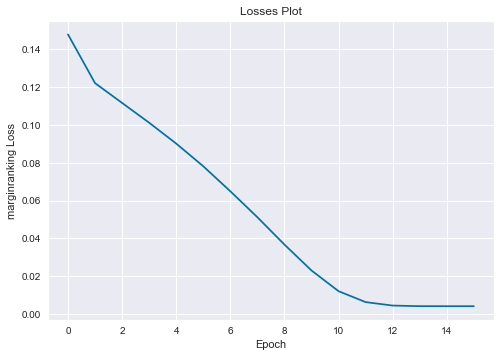

In [7]:
pipeline_result_s.plot_losses()

In [8]:
mapped_triples = dataset.training.mapped_triples

In [9]:
model = pipeline_result_s.model

In [10]:
triples_factory = pipeline_result_s.training

In [11]:
entity_labels = pipeline_result_s.training.entity_id_to_label
entity_labels_df = pd.DataFrame.from_dict(entity_labels, orient='index', columns=['entity_label'])

relation_labels = pipeline_result_s.training.relation_id_to_label
relation_labels_df = pd.DataFrame.from_dict(relation_labels, orient='index', columns=['relation_label'])

entity_labels_df.head()
relation_labels_df.head()

,relation_label
0,/american_football/football_team/current_roste...
1,/award/award_category/category_of
2,/award/award_category/disciplines_or_subjects
3,/award/award_category/nominees./award/award_no...
4,/award/award_category/winners./award/award_hon...


# Clustering of entities

In [12]:
#clustering of entities:

triple_array = np.array(mapped_triples)

kmeans = KMeans(n_clusters=3, random_state=0)

cluster_labels = kmeans.fit_predict(triple_array)


cluster_df = pd.DataFrame(triple_array, columns=['head', 'relation','tail'])
cluster_df['cluster_label'] = cluster_labels
print (cluster_df)

         head  relation   tail  cluster_label
0           0       120  13647              1
1           0       125  13647              1
2           0       126      0              0
3           0       127  12940              1
4           0       129   8652              1
...       ...       ...    ...            ...
272110  14503        50  10165              2
272111  14503       125  13680              2
272112  14503       126  14503              2
272113  14503       127  12940              2
272114  14504       127  12940              2

[272115 rows x 4 columns]


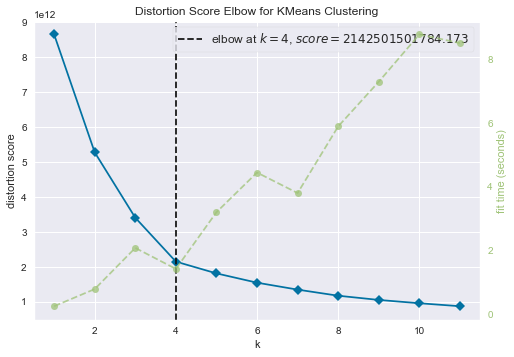

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# elbow method for determining k

visualizer = KElbowVisualizer(kmeans, k=(1,12)).fit(cluster_df)
visualizer.show()

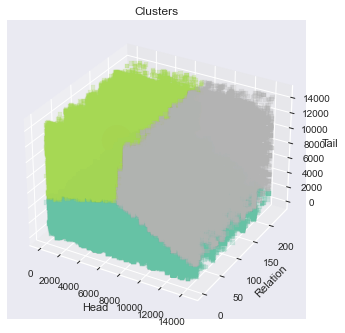

these are the coordinates for the centroids: 
 [[ 6197.28648103    96.83152538  3108.27848688]
 [ 3592.50546214    98.5987731  10046.84958314]
 [11051.1425831     95.14467673  9335.17109972]]
 
these are the closest datapoints to each centroid / representatives for eacht cluster: 
 
[[6198   59 3086]] [43.90973012]
[[ 3632    93 10033]] [42.22529733]
[[11082   113  9322]] [38.0061918]


In [14]:
#determining centroids and visualizing clusters:



kmeans = KMeans(n_clusters=3, random_state=0)

cluster_labels = kmeans.fit_predict(triple_array)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(cluster_df['head'])
y = np.array(cluster_df['relation'])
z = np.array(cluster_df['tail'])

ax.scatter(x,y,z, marker="s", c=cluster_df["cluster_label"], s=20, alpha=0.25, cmap="Set2")
ax.set_title('Clusters')
ax.set_xlabel('Head')
ax.set_ylabel('Relation')
ax.set_zlabel('Tail')

centroids = kmeans.cluster_centers_

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s = 900, c = 'r',
           marker='o', label = 'Centroid', alpha=1)


plt.show()

closest, _ = pairwise_distances_argmin_min(centroids, triple_array)

print("these are the coordinates for the centroids: \n", centroids)
print(" ")
print("these are the closest datapoints to each centroid / representatives for eacht cluster: ")
print(" ")


representatives_list = []
#get the closest datapoints to each centroid
for i in centroids:
    closest, distance = pairwise_distances_argmin_min([i], triple_array)
    representatives = (triple_array[closest], distance)
    representatives_list.append(representatives[0])
    print(representatives[0], representatives[1])
    


In [15]:
print(representatives_list)

[array([[6198,   59, 3086]], dtype=int64), array([[ 3632,    93, 10033]], dtype=int64), array([[11082,   113,  9322]], dtype=int64)]


In [16]:
representatives_list_with_labels = []

for triple in representatives_list:
    representatives_list_with_labels.append(
        [
        entity_labels_df.iloc[triple[0][0]][0], 
         entity_labels_df.iloc[triple[0][2]][0],
            triple[0][0],
                triple[0][2]
        ],
        
    )

print(representatives_list_with_labels)

[['/m/03hvk2', '/m/01z0lb', 6198, 3086], ['/m/026hh0m', '/m/086k8', 3632, 10033], ['/m/0bymv', '/m/070m6c', 11082, 9322]]


# Link Prediction Task (situation S)

In [17]:
representatives_list_with_labels = []

for triple in representatives_list:
    representatives_list_with_labels.append(
        [
        entity_labels_df.iloc[triple[0][0]][0], 
         entity_labels_df.iloc[triple[0][2]][0],
            triple[0][0],
                triple[0][2]
        ],
        
    )

print(representatives_list_with_labels)

[['/m/03hvk2', '/m/01z0lb', 6198, 3086], ['/m/026hh0m', '/m/086k8', 3632, 10033], ['/m/0bymv', '/m/070m6c', 11082, 9322]]


In [18]:
#dataframes = []
#entity_tails = []

#for i in triples_for_link_prediction_list_with_labels:
#    pred_df = predict_triples_df(model, triples=(i[0], i[1], i[2]) ,triples_factory=pipeline_result_s.training)
#    pred_df['head_label'] = i[0]
#    pred_df['relation_label'] = i[1]
#    pred_df['tail_label'] = i[2]
#    pred_df['head_id'] = i[3]
#    pred_df['relation_id'] = i[4]
#    pred_df['tail_id'] = i[5]
#    dataframes.append(pred_df)
#    entity_tails.append([i[0], i[2]])
    
#result_s = pd.concat(dataframes)

In [19]:
dataframes = []
entity_tails = []

for i in representatives_list_with_labels:
    pred_df = get_relation_prediction_df(model, i[0], i[1], add_novelties=True ,triples_factory=pipeline_result_s.training)
    pred_df['head_label'] = i[0]
    pred_df['tail_label'] = i[1]
    pred_df['head_id'] = i[2]
    pred_df['tail_id'] = i[3]
    dataframes.append(pred_df)
    entity_tails.append([i[0], i[1]])
    
result_s = pd.concat(dataframes)


In [20]:
result_s = result_s.reset_index(drop=True)
result_s

,relation_id,relation_label,score,in_training,head_label,tail_label,head_id,tail_id
0,141,/medicine/disease/notable_people_with_this_con...,0.500000,False,/m/03hvk2,/m/01z0lb,6198,3086
1,110,/government/political_party/politicians_in_thi...,0.500000,False,/m/03hvk2,/m/01z0lb,6198,3086
2,114,/ice_hockey/hockey_team/current_roster./sports...,0.500000,False,/m/03hvk2,/m/01z0lb,6198,3086
3,107,/government/governmental_body/members./governm...,0.500000,False,/m/03hvk2,/m/01z0lb,6198,3086
4,172,/organization/organization/headquarters./locat...,0.500000,False,/m/03hvk2,/m/01z0lb,6198,3086
...,...,...,...,...,...,...,...,...
706,63,/education/university/domestic_tuition./measur...,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
707,16,/award/hall_of_fame/inductees./award/hall_of_f...,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
708,170,/organization/organization/child./organization...,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
709,132,/location/statistical_region/gdp_nominal./meas...,0.500000,False,/m/0bymv,/m/070m6c,11082,9322


In [21]:
triples_not_in_training_s = result_s[result_s['in_training'] == False]
triples_not_in_training_s

,relation_id,relation_label,score,in_training,head_label,tail_label,head_id,tail_id
0,141,/medicine/disease/notable_people_with_this_con...,0.500000,False,/m/03hvk2,/m/01z0lb,6198,3086
1,110,/government/political_party/politicians_in_thi...,0.500000,False,/m/03hvk2,/m/01z0lb,6198,3086
2,114,/ice_hockey/hockey_team/current_roster./sports...,0.500000,False,/m/03hvk2,/m/01z0lb,6198,3086
3,107,/government/governmental_body/members./governm...,0.500000,False,/m/03hvk2,/m/01z0lb,6198,3086
4,172,/organization/organization/headquarters./locat...,0.500000,False,/m/03hvk2,/m/01z0lb,6198,3086
...,...,...,...,...,...,...,...,...
706,63,/education/university/domestic_tuition./measur...,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
707,16,/award/hall_of_fame/inductees./award/hall_of_f...,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
708,170,/organization/organization/child./organization...,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
709,132,/location/statistical_region/gdp_nominal./meas...,0.500000,False,/m/0bymv,/m/070m6c,11082,9322


In [22]:
head_id = triples_not_in_training_s['head_id'].to_list()
relation_id = triples_not_in_training_s['relation_id'].to_list()
tail_id = triples_not_in_training_s['tail_id'].to_list()

triples_not_in_training_ids = []

for idx, ele in enumerate(head_id):
    triples_not_in_training_ids.append([ele, relation_id[idx], tail_id[idx]])
    
    
triples_not_in_training_ids_array = np.array(triples_not_in_training_ids)

print('length of triples to inspect: ', len(triples_not_in_training_ids_array))
print(' ')
print('triples array to inspect:\n', triples_not_in_training_ids_array)


length of triples to inspect:  708
 
triples array to inspect:
 [[ 6198   141  3086]
 [ 6198   110  3086]
 [ 6198   114  3086]
 ...
 [11082   170  9322]
 [11082   132  9322]
 [11082    41  9322]]


# Oversampling situation A

In [23]:
mapped_triples_training = pipeline_result_s.training.mapped_triples

test_array = mapped_triples_training.numpy()

add_triple = triples_not_in_training_ids_array[[0]]

test_array = np.concatenate((test_array, add_triple))

pt_tensor_from_list = torch.Tensor(test_array)
typecst = pt_tensor_from_list.type(torch.int64)

print(typecst)

tensor([[    0,   120, 13647],
        [    0,   125, 13647],
        [    0,   126,     0],
        ...,
        [14503,   127, 12940],
        [14504,   127, 12940],
        [ 6198,   141,  3086]])


In [24]:
mapped_triples_training = pipeline_result_s.training.mapped_triples
mapped_triples_testing = dataset.testing.mapped_triples

mapped_triples_training_array = mapped_triples_training.numpy()

add_triple = triples_not_in_training_ids_array[[0]]

length = len(mapped_triples_training)/10

for i in range(int(length)):
    mapped_triples_training_array = np.concatenate((mapped_triples_training_array, add_triple))

pt_tensor_from_list = torch.Tensor(mapped_triples_training_array)
mapped_triples_training_plus_representative_triple = pt_tensor_from_list.type(torch.int64)

print('mapped triples of training result from first pipeline: ')
print(mapped_triples_training)
print(' ')
print('add representatives to this set')
print(' ')
print('amount of oversampling: ', int(length))
print(' ')

#entity_labels = pipeline_result.training.entity_id_to_label
#print(entity_labels)
#relation_labels = pipeline_result.training.relation_id_to_label
#print(relation_labels)

print('mapped triples tensor with the representative triple: ')
print(mapped_triples_training_plus_representative_triple)


mapped triples of training result from first pipeline: 
tensor([[    0,   120, 13647],
        [    0,   125, 13647],
        [    0,   126,     0],
        ...,
        [14503,   126, 14503],
        [14503,   127, 12940],
        [14504,   127, 12940]])
 
add representatives to this set
 
amount of oversampling:  27211
 
mapped triples tensor with the representative triple: 
tensor([[    0,   120, 13647],
        [    0,   125, 13647],
        [    0,   126,     0],
        ...,
        [ 6198,   141,  3086],
        [ 6198,   141,  3086],
        [ 6198,   141,  3086]])


# Loading KGE (Situation A)

In [25]:
entity_to_id=pipeline_result_s.training.entity_to_id
relation_to_id=pipeline_result_s.training.relation_to_id

In [26]:
training_A = TriplesFactory(mapped_triples_training_plus_representative_triple, entity_to_id, relation_to_id)
testing_A = TriplesFactory(mapped_triples_testing, entity_to_id, relation_to_id)

In [48]:
checkpoint_A = 'checkpoint_a.pt'

In [49]:
from pykeen.pipeline import pipeline
pipeline_result_A = pipeline(
    training=training_A,
    testing=testing_A,
    model= RESCAL,
    model_kwargs = dict(predict_with_sigmoid=True),
    training_loop='sLCWA',
    negative_sampler='basic',
    evaluator='RankBasedEvaluator',
    training_kwargs=dict(
        num_epochs=16,
        checkpoint_name=checkpoint_A,
        checkpoint_directory=r'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding\Experiments\FB15K-237',
        checkpoint_frequency=5),
    random_seed = 3757357109,
    #result_tracker='mlflow',
    #result_tracker_kwargs=dict(
        #tracking_uri='http://localhost:5000',
        #experiment_name='Training of TransE on Nations',
    #),
    device='gpu'
)
#result_A.save_to_directory(r'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding')

#seed 3757357109

INFO:pykeen.pipeline.api:=> no training loop checkpoint file found at 'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding\Experiments\FB15K-237\checkpoint_a.pt'. Creating a new file.
INFO:pykeen.pipeline.api:Using device: gpu
C:\Users\tommy\anaconda3\envs\ThesisLaptop\lib\site-packages\pykeen\nn\representation.py:372: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
INFO:pykeen.training.training_loop:=> no checkpoint found at 'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding\Experiments\FB15K-237\checkpoint_a.pt'. Creating a new file.
Training batches on cpu:  28%|██▊       | 333/1170 [00:11<00:27, 30.34batch/s]


Training batches on cpu:  57%|█████▋    | 666/1170 [00:23<00:21, 23.09batch/s]


Training batches on cpu:  84%|████████▍ | 985/1170 [00:34<00:06, 28.31batch/s]


Training batches on cpu:  13%|█▎        | 150/1170 [00:05<00:34, 29.35batch/s]


Training batches on cpu:  35%|███▌      | 413/1170 [00:17<00:38, 19.91batch/s]


Training batches on cpu:  61%|██████    | 708/1170 [00:29<00:21, 21.63batch/s]


Training batches on cpu:  81%|████████  | 946/1170 [00:42<00:11, 19.67batch/s]


Training batches on cpu:   5%|▍         | 54/1170 [00:02<00:43, 25.48batch/s]


Training batches on cpu:  30%|██▉       | 348/1170 [00:14<00:36, 22.33batch/s]


Training batches on cpu:  55%|█████▌    | 645/1170 [00:26<00:20, 25.96batch/s]


Training batches on cpu:  81%|████████  | 942/1170 [00:39<00:09, 24.93batch/s]


Training batches on cpu:   5%|▍         | 53/1170 [00:02<00:52, 21.43batch/s]


Training batches on cpu:  31%|███       | 362/1170 [00:15<00:27, 29.54batch/s]


Training batches on cpu:  58%|█████▊    | 677/1170 [00:27<00:18, 26.44batch/s]


Training batches on cpu:  85%|████████▍ | 991/1170 [00:39<00:08, 20.45batch/s]


Training batches on cpu:   9%|▉         | 111/1170 [00:04<00:40, 25.89batch/s]


Training batches on cpu:  35%|███▍      | 405/1170 [00:17<00:37, 20.42batch/s]


Training batches on cpu:  60%|██████    | 702/1170 [00:29<00:18, 25.79batch/s]


Training batches on cpu:  85%|████████▌ | 999/1170 [00:42<00:06, 24.73batch/s]


Training batches on cpu:  10%|█         | 118/1170 [00:05<00:45, 23.32batch/s]


Training batches on cpu:  34%|███▍      | 400/1170 [00:17<00:32, 23.39batch/s]


Training batches on cpu:  59%|█████▉    | 691/1170 [00:30<00:20, 23.64batch/s]


Training batches on cpu:  84%|████████▍ | 988/1170 [00:42<00:08, 21.31batch/s]


Training batches on cpu:   9%|▉         | 108/1170 [00:04<00:46, 22.77batch/s]


Training batches on cpu:  33%|███▎      | 382/1170 [00:17<00:42, 18.48batch/s]


Training batches on cpu:  56%|█████▌    | 654/1170 [00:30<00:22, 22.93batch/s]


Training batches on cpu:  79%|███████▉  | 929/1170 [00:43<00:09, 25.42batch/s]


Training batches on cpu:   2%|▏         | 28/1170 [00:01<00:58, 19.42batch/s]


Training batches on cpu:  26%|██▌       | 304/1170 [00:14<00:59, 14.67batch/s]


Training batches on cpu:  51%|█████     | 598/1170 [00:27<00:26, 21.51batch/s]


Training batches on cpu:  76%|███████▋  | 895/1170 [00:40<00:10, 26.49batch/s]


Training batches on cpu:   1%|▏         | 16/1170 [00:00<00:59, 19.54batch/s]


Training batches on cpu:  28%|██▊       | 322/1170 [00:13<00:26, 32.00batch/s]


Training batches on cpu:  53%|█████▎    | 616/1170 [00:25<00:26, 20.52batch/s]


Training batches on cpu:  76%|███████▋  | 894/1170 [00:38<00:10, 27.20batch/s]


Training batches on cpu:   1%|▏         | 15/1170 [00:00<00:46, 24.88batch/s]


Training batches on cpu:  29%|██▉       | 337/1170 [00:12<00:29, 27.95batch/s]


Training batches on cpu:  55%|█████▍    | 639/1170 [00:23<00:23, 23.04batch/s]


Training batches on cpu:  80%|███████▉  | 935/1170 [00:35<00:09, 24.13batch/s]


Training batches on cpu:   8%|▊         | 88/1170 [00:03<00:38, 27.93batch/s]


Training batches on cpu:  34%|███▍      | 395/1170 [00:15<00:29, 26.21batch/s]


Training batches on cpu:  62%|██████▏   | 721/1170 [00:27<00:18, 24.75batch/s]


Training batches on cpu:  88%|████████▊ | 1029/1170 [00:38<00:05, 26.91batch/s]


Training batches on cpu:  14%|█▍        | 165/1170 [00:05<00:33, 29.99batch/s]


Training batches on cpu:  41%|████      | 480/1170 [00:18<00:27, 24.76batch/s]


Training batches on cpu:  68%|██████▊   | 792/1170 [00:29<00:16, 23.29batch/s]


Training batches on cpu:  97%|█████████▋| 1138/1170 [00:42<00:01, 29.53batch/s]


Training batches on cpu:  25%|██▍       | 290/1170 [00:10<00:33, 26.04batch/s]


Training batches on cpu:  52%|█████▏    | 606/1170 [00:21<00:20, 27.55batch/s]


Training batches on cpu:  80%|███████▉  | 931/1170 [00:33<00:08, 28.96batch/s]


Training batches on cpu:   5%|▌         | 60/1170 [00:02<00:44, 24.85batch/s]


Training batches on cpu:  32%|███▏      | 374/1170 [00:13<00:27, 28.72batch/s]


Training batches on cpu:  59%|█████▉    | 695/1170 [00:24<00:15, 29.74batch/s]


Training batches on cpu:  88%|████████▊ | 1025/1170 [00:36<00:04, 29.95batch/s]


Training batches on cpu:  12%|█▏        | 142/1170 [00:05<00:43, 23.45batch/s]


Training batches on cpu:  38%|███▊      | 442/1170 [00:17<00:29, 24.86batch/s]


Training batches on cpu:  64%|██████▍   | 748/1170 [00:29<00:14, 29.60batch/s]


Training batches on cpu:  96%|█████████▌| 1119/1170 [00:41<00:01, 28.24batch/s]


Training batches on cpu:  22%|██▏       | 256/1170 [00:09<00:30, 29.55batch/s]


Training batches on cpu:  49%|████▉     | 578/1170 [00:20<00:20, 29.48batch/s]


Training batches on cpu:  78%|███████▊  | 912/1170 [00:32<00:10, 24.35batch/s]


Training epochs on cpu: 100%|██████████| 16/16 [12:27<00:00, 46.70s/epoch, loss=0.00425, prev_loss=0.00426]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|██████████| 20.4k/20.4k [01:06<00:00, 307triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 67.73s seconds


# Link Prediction Task (situation A)

In [50]:
dataframes = []
entity_tails = []

model_A = pipeline_result_A.model
for i in representatives_list_with_labels:
    pred_df = get_relation_prediction_df(model_A, i[0], i[1], add_novelties=True ,triples_factory=pipeline_result_A.training)
    pred_df['head_label'] = i[0]
    pred_df['tail_label'] = i[1]
    pred_df['head_id'] = i[2]
    pred_df['tail_id'] = i[3]
    dataframes.append(pred_df)
    entity_tails.append([i[0], i[1]])
    
result_A = pd.concat(dataframes)


In [51]:
result_A = result_A.reset_index(drop=True)
result_A

,relation_id,relation_label,score,in_training,head_label,tail_label,head_id,tail_id
0,141,/medicine/disease/notable_people_with_this_con...,0.730522,True,/m/03hvk2,/m/01z0lb,6198,3086
1,116,/influence/influence_node/peers./influence/pee...,0.500229,False,/m/03hvk2,/m/01z0lb,6198,3086
2,1,/award/award_category/category_of,0.500202,False,/m/03hvk2,/m/01z0lb,6198,3086
3,104,/film/special_film_performance_type/film_perfo...,0.500174,False,/m/03hvk2,/m/01z0lb,6198,3086
4,91,/film/film/prequel,0.500160,False,/m/03hvk2,/m/01z0lb,6198,3086
...,...,...,...,...,...,...,...,...
706,236,/user/tsegaran/random/taxonomy_subject/entry./...,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
707,215,/sports/sports_team/sport,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
708,174,/organization/organization/place_founded,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
709,181,/people/ethnicity/geographic_distribution,0.500000,False,/m/0bymv,/m/070m6c,11082,9322


In [52]:
triples_not_in_training_A = result_A[result_A['in_training'] == False]
triples_not_in_training_A

,relation_id,relation_label,score,in_training,head_label,tail_label,head_id,tail_id
1,116,/influence/influence_node/peers./influence/pee...,0.500229,False,/m/03hvk2,/m/01z0lb,6198,3086
2,1,/award/award_category/category_of,0.500202,False,/m/03hvk2,/m/01z0lb,6198,3086
3,104,/film/special_film_performance_type/film_perfo...,0.500174,False,/m/03hvk2,/m/01z0lb,6198,3086
4,91,/film/film/prequel,0.500160,False,/m/03hvk2,/m/01z0lb,6198,3086
5,17,/award/ranked_item/appears_in_ranked_lists./aw...,0.500146,False,/m/03hvk2,/m/01z0lb,6198,3086
...,...,...,...,...,...,...,...,...
706,236,/user/tsegaran/random/taxonomy_subject/entry./...,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
707,215,/sports/sports_team/sport,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
708,174,/organization/organization/place_founded,0.500000,False,/m/0bymv,/m/070m6c,11082,9322
709,181,/people/ethnicity/geographic_distribution,0.500000,False,/m/0bymv,/m/070m6c,11082,9322


# Oversampling Situation B + Loading KGE (negative oversampling)

In [53]:
entity_to_id=pipeline_result_s.training.entity_to_id
relation_to_id=pipeline_result_s.training.relation_to_id

In [54]:
training_B = TriplesFactory(mapped_triples_training, entity_to_id, relation_to_id)
testing_B = TriplesFactory(mapped_triples_testing, entity_to_id, relation_to_id)

In [55]:
class MyNegativeSampler(BasicNegativeSampler):
    r"""A basic negative sampler.

    This negative sampler that corrupts positive triples $(h,r,t) \in \mathcal{K}$ by replacing either $h$, $r$ or $t$
    based on the chosen corruption scheme. The corruption scheme can contain $h$, $r$ and $t$ or any subset of these.

    Steps:

    1. Randomly (uniformly) determine whether $h$, $r$ or $t$ shall be corrupted for a positive triple
       $(h,r,t) \in \mathcal{K}$.
    2. Randomly (uniformly) sample an entity $e \in \mathcal{E}$ or relation $r' \in \mathcal{R}$ for selection to
       corrupt the triple.

       - If $h$ was selected before, the corrupted triple is $(e,r,t)$
       - If $r$ was selected before, the corrupted triple is $(h,r',t)$
       - If $t$ was selected before, the corrupted triple is $(h,r,e)$
    3. If ``filtered`` is set to ``True``, all proposed corrupted triples that also exist as
       actual positive triples $(h,r,t) \in \mathcal{K}$ will be removed.
    """

    def __init__(
        self,
        *,
        triple: torch.Tensor,
        corruption_scheme: Optional[Collection[Target]] = None,
        **kwargs,
    ) -> None:
        """Initialize the basic negative sampler with the given entities.

        :param corruption_scheme:
            What sides ('h', 'r', 't') should be corrupted. Defaults to head and tail ('h', 't').
        :param kwargs:
            Additional keyword based arguments passed to :class:`pykeen.sampling.NegativeSampler`.
        """
        
        super().__init__(**kwargs)
        self.corruption_scheme = corruption_scheme or (LABEL_HEAD, LABEL_TAIL)
        # Set the indices
        self._corruption_indices = [TARGET_TO_INDEX[side] for side in self.corruption_scheme]
        self.triple=triple
        
        
        

    def corrupt_batch(self, positive_batch: torch.LongTensor) -> torch.LongTensor:  # noqa: D102
        batch_shape = positive_batch.shape[:-1]

        # clone positive batch for corruption (.repeat_interleave creates a copy)
        negative_batch = positive_batch.view(-1, 3).repeat_interleave(self.num_negs_per_pos, dim=0)

        # Bind the total number of negatives to sample in this batch
        total_num_negatives = negative_batch.shape[0]

        # Equally corrupt all sides
        split_idx = int(ceil(total_num_negatives / len(self._corruption_indices)))

        # Do not detach, as no gradients should flow into the indices.
        for index, start in zip(self._corruption_indices, range(0, total_num_negatives, split_idx)):
            stop = min(start + split_idx, total_num_negatives)
            random_replacement_(
                batch=negative_batch,
                index=index,
                selection=slice(start, stop),
                size=stop - start,
                max_index=self.num_relations if index == 1 else self.num_entities,
            )

        
        
        negative_batch_array = negative_batch.view(*batch_shape, self.num_negs_per_pos, 3).numpy()
        first_half = negative_batch_array[:int((len(negative_batch_array)/2))]
        second_half = negative_batch_array[int((len(negative_batch_array)/2)):]
        
        second_half_with_triple = []
        
        for i in range(int((len(negative_batch_array)/2))):
            second_half_with_triple.append([self.triple] )
        
        second_half_with_triple_array = np.array(second_half_with_triple)
        first_half_array = np.array(first_half)
        
        test_list1 = np.ndarray.tolist(first_half_array)
        test_list2 = np.ndarray.tolist(second_half_with_triple_array)
        
        negative_batch_with_triple_list = test_list1 + test_list2
        
        negative_batch_with_triple_array = np.array(negative_batch_with_triple_list)
        
        pt_tensor_from_list = torch.Tensor(negative_batch_with_triple_array)
        typecst = pt_tensor_from_list.type(torch.int64)
        
        #return negative_batch.view(*batch_shape, self.num_negs_per_pos, 3)
        return  typecst


In [56]:
def random_replacement_(batch: torch.LongTensor, index: int, selection: slice, size: int, max_index: int) -> None:
    """
    Replace a column of a batch of indices by random indices.

    :param batch: shape: `(*batch_dims, d)`
        the batch of indices
    :param index:
        the index (of the last axis) which to replace
    :param selection:
        a selection of the batch, e.g., a slice or a mask
    :param size:
        the size of the selection
    :param max_index:
        the maximum index value at the chosen position
    """
    # At least make sure to not replace the triples by the original value
    # To make sure we don't replace the {head, relation, tail} by the
    # original value we shift all values greater or equal than the original value by one up
    # for that reason we choose the random value from [0, num_{heads, relations, tails} -1]
    replacement = torch.randint(
        high=max_index - 1,
        size=(size,),
        device=batch.device,
    )
    replacement += (replacement >= batch[selection, index]).long()
    batch[selection, index] = replacement

In [57]:
add_triple = triples_not_in_training_ids_array[[0]]

triple=add_triple[0]
print(triple)

[6198  141 3086]


In [58]:
checkpoint_B = 'checkpoint_b.pt'

In [59]:
pipeline_result_B = pipeline(
    training=training_B,
    testing=testing_B,
    model= RESCAL,
    loss= 'MarginRankingLoss',
    loss_kwargs = dict(
    reduction="mean"),
    training_loop='sLCWA',
    negative_sampler=MyNegativeSampler,
    negative_sampler_kwargs = dict(triple=triple), 
    evaluator='RankBasedEvaluator',
    training_kwargs=dict(
        num_epochs=16,
        checkpoint_name=checkpoint_B,
        checkpoint_directory=r'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding\Experiments\FB15K-237',
        checkpoint_frequency=5),
    random_seed = 3757357109,
    #result_tracker='mlflow',
    #result_tracker_kwargs=dict(
        #tracking_uri='http://localhost:5000',
        #experiment_name='Training of TransE on Nations',
    #),
    device='cpu'
)

INFO:pykeen.pipeline.api:loaded random seed 3757357109 from checkpoint.
INFO:pykeen.pipeline.api:Using device: cpu
C:\Users\tommy\anaconda3\envs\ThesisLaptop\lib\site-packages\pykeen\nn\representation.py:372: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")
INFO:pykeen.training.training_loop:=> loading checkpoint 'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding\Experiments\FB15K-237\checkpoint_b.pt'
INFO:pykeen.training.training_loop:=> loaded checkpoint 'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding\Experiments\FB15K-237\checkpoint_b.pt' stopped after having finished epoch 16
INFO:pykeen.stoppers.stopper:=> loading stopper summary dict from training loop checkpoint in 'C:\Users\tommy\OneDrive\Documenten\year 3\Bachelor AI Project\coding\Experiments\FB15K-237\checkpoint_b.pt'
INFO:pykeen.stoppers.stopper:=> loaded stopper summary 

In [60]:
dataframes = []
entity_tails = []

model_B = pipeline_result_B.model
for i in representatives_list_with_labels:
    pred_df = get_relation_prediction_df(model_B, i[0], i[1], add_novelties=True ,triples_factory=pipeline_result_B.training)
    pred_df['head_label'] = i[0]
    pred_df['tail_label'] = i[1]
    pred_df['head_id'] = i[2]
    pred_df['tail_id'] = i[3]
    dataframes.append(pred_df)
    entity_tails.append([i[0], i[1]])
    
result_B = pd.concat(dataframes)


In [61]:
result_B = result_B.reset_index(drop=True)
result_B

,relation_id,relation_label,score,in_training,head_label,tail_label,head_id,tail_id
0,234,/user/jg/default_domain/olympic_games/sports,2.049946e-08,False,/m/03hvk2,/m/01z0lb,6198,3086
1,162,/olympics/olympic_games/sports,2.036926e-08,False,/m/03hvk2,/m/01z0lb,6198,3086
2,149,/music/genre/artists,2.013096e-08,False,/m/03hvk2,/m/01z0lb,6198,3086
3,159,/music/record_label/artist,1.829637e-08,False,/m/03hvk2,/m/01z0lb,6198,3086
4,150,/music/genre/parent_genre,1.419483e-08,False,/m/03hvk2,/m/01z0lb,6198,3086
...,...,...,...,...,...,...,...,...
706,12,/award/award_winner/awards_won./award/award_ho...,-2.093732e-04,False,/m/0bymv,/m/070m6c,11082,9322
707,85,/film/film/genre,-2.383758e-04,False,/m/0bymv,/m/070m6c,11082,9322
708,234,/user/jg/default_domain/olympic_games/sports,-3.235420e-04,False,/m/0bymv,/m/070m6c,11082,9322
709,162,/olympics/olympic_games/sports,-3.324085e-04,False,/m/0bymv,/m/070m6c,11082,9322


In [62]:
triples_not_in_training_B = result_B[result_B['in_training'] == False]
triples_not_in_training_B

,relation_id,relation_label,score,in_training,head_label,tail_label,head_id,tail_id
0,234,/user/jg/default_domain/olympic_games/sports,2.049946e-08,False,/m/03hvk2,/m/01z0lb,6198,3086
1,162,/olympics/olympic_games/sports,2.036926e-08,False,/m/03hvk2,/m/01z0lb,6198,3086
2,149,/music/genre/artists,2.013096e-08,False,/m/03hvk2,/m/01z0lb,6198,3086
3,159,/music/record_label/artist,1.829637e-08,False,/m/03hvk2,/m/01z0lb,6198,3086
4,150,/music/genre/parent_genre,1.419483e-08,False,/m/03hvk2,/m/01z0lb,6198,3086
...,...,...,...,...,...,...,...,...
706,12,/award/award_winner/awards_won./award/award_ho...,-2.093732e-04,False,/m/0bymv,/m/070m6c,11082,9322
707,85,/film/film/genre,-2.383758e-04,False,/m/0bymv,/m/070m6c,11082,9322
708,234,/user/jg/default_domain/olympic_games/sports,-3.235420e-04,False,/m/0bymv,/m/070m6c,11082,9322
709,162,/olympics/olympic_games/sports,-3.324085e-04,False,/m/0bymv,/m/070m6c,11082,9322


# Kendall Tau method

the triple missing in situation A is the triple that was oversampled

In [63]:
triples_not_in_training_s_copy = triples_not_in_training_s.copy()
triples_not_in_training_s_copy.drop(index=triples_not_in_training_s_copy.index[0], 
        axis=0, 
        inplace=True)

print(triples_not_in_training_s_copy['score'], triples_not_in_training_A['score'], triples_not_in_training_B['score'])


1      0.500000
2      0.500000
3      0.500000
4      0.500000
5      0.500000
         ...   
706    0.500000
707    0.500000
708    0.500000
709    0.500000
710    0.499999
Name: score, Length: 707, dtype: float64 1      0.500229
2      0.500202
3      0.500174
4      0.500160
5      0.500146
         ...   
706    0.500000
707    0.500000
708    0.500000
709    0.500000
710    0.500000
Name: score, Length: 707, dtype: float64 0      2.049946e-08
1      2.036926e-08
2      2.013096e-08
3      1.829637e-08
4      1.419483e-08
           ...     
706   -2.093732e-04
707   -2.383758e-04
708   -3.235420e-04
709   -3.324085e-04
710   -3.633168e-04
Name: score, Length: 708, dtype: float64


In [64]:
tauA, p_valueA = stats.kendalltau(triples_not_in_training_s_copy['score'], triples_not_in_training_A['score'])
print(tauA, p_valueA)

0.326302783200047 1.0295250702396282e-23


In [65]:
tauB, p_valueB = stats.kendalltau(triples_not_in_training_s['score'], triples_not_in_training_B['score'])
print(tauB, p_valueB)

0.4353695670148272 7.557717296945872e-51


These are the repspective tau and p_value of d(S, A): 0.553509512327372 8.860314842794189e-83 

These are the respective tau and p_value of d(S, B): 0.531347809003213 1.383965698552152e-76


i found that training the number of epochs in the training loop is significantly important for the outcome of the scores and the respective tau values

## Probabilities of triple being True and False:

In [66]:
prob_triple = triples_not_in_training_s.iloc[0]
prob_triple_positive = prob_triple['score']
prob_triple_negative = (1 - prob_triple_positive)

print(prob_triple_negative)

0.4999998211860657


# Expected Impact (E = P(A)*d(S,A) + P(B)*d(S,B))

In [67]:
Expected_impact = prob_triple_positive*tauA + prob_triple_negative*tauB

In [69]:
print(prob_triple, Expected_impact)

relation_id                                                     141
relation_label    /medicine/disease/notable_people_with_this_con...
score                                                           0.5
in_training                                                   False
head_label                                                /m/03hvk2
tail_label                                                /m/01z0lb
head_id                                                        6198
tail_id                                                        3086
Name: 0, dtype: object 0.3808361556047764


# Model that iteratively oversamples a triple with representative h-t combination, then trains the KGE and performs a Link Prediction Task that predicts all scores for all relations in combination with the h-t pair. All Scores will be added to a list. This list will be a list with lists to be compared with Situation S

In [ ]:
mapped_triples_training = pipeline_result_s.training.mapped_triples
mapped_triples_testing = dataset.testing.mapped_triples

entity_to_id=pipeline_result_s.training.entity_to_id
relation_to_id=pipeline_result_s.training.relation_to_id

testing = TriplesFactory(mapped_triples_testing, entity_to_id, relation_to_id)

mapped_triples_training_array = mapped_triples_training.numpy()

length = len(mapped_triples_training)/10000

print('mapped triples of training result from first pipeline: ')
print(mapped_triples_training)
print(' ')    
print('amount of oversampling: ', int(length))
print(' ')
print('------------------------')

score_list = []

for idx, ele in enumerate(tqdm(triples_not_in_training_ids_array)):
    for j in range (int(length)):
        mapped_triples_training_array = np.concatenate((mapped_triples_training_array, [triples_not_in_training_ids_array[idx]]))
        
    pt_tensor_from_list = torch.Tensor(mapped_triples_training_array)
    mapped_triples_training_plus_representative_triple = pt_tensor_from_list.type(torch.int64)
    training = TriplesFactory(mapped_triples_training_plus_representative_triple, entity_to_id, relation_to_id)
    
    pipeline_result_A = pipeline(
    training=training,
    testing=testing,
    model= TransE,
    training_loop='sLCWA',
    negative_sampler='basic',
    evaluator='RankBasedEvaluator',
    evaluator_kwargs=dict(batch_size=64),
    training_kwargs=dict(num_epochs=1),
    random_seed = 3757357109,
    #result_tracker='mlflow',
    #result_tracker_kwargs=dict(
        #tracking_uri='http://localhost:5000',
        #experiment_name='Training of TransE on Nations',
    #),
    device='gpu'
    )
    dataframes = []
    entity_tails = []

    model_A = pipeline_result_A.model
    for i in representatives_list_with_labels:
        pred_df = get_relation_prediction_df(model_A, i[0], i[1], add_novelties=True ,triples_factory=pipeline_result_A.training)
        pred_df['head_label'] = i[0]
        pred_df['tail_label'] = i[1]
        pred_df['head_id'] = i[2]
        pred_df['tail_id'] = i[3]
        dataframes.append(pred_df)
        entity_tails.append([i[0], i[1]])

    result_A = pd.concat(dataframes)
    
    result_A = result_A.reset_index(drop=True)
    triples_not_in_training_A = result_A[result_A['in_training'] == False]
    
    scores = triples_not_in_training_A['score']
    
    score_list.append([scores])
    


    

#entity_labels = pipeline_result.training.entity_id_to_label
#print(entity_labels)
#relation_labels = pipeline_result.training.relation_id_to_label
#print(relation_labels)

    #print('mapped triples tensor with the representative triple: ', ele)
    #print(mapped_triples_training_plus_representative_triple)

print(score_list)
